#General Initialization (Run)

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# modify "customized_path_to_project", path of folder in drive, where you have stored your project
customized_path_to_project = "/content/drive/MyDrive/7th project/content/drive/Deep Learning"
sys.path.append(customized_path_to_project)

# Data Exploration (Run)

In [16]:
CREMA = os.path.join(customized_path_to_project, "Data", "CREMA-D")
crema_directory_list = os.listdir(CREMA)

labels = []
paths = []

for dir in crema_directory_list:
    directories = os.listdir(CREMA +'/' +dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            labels.append('surprise')
        else:
            labels.append(part)
        paths.append(CREMA+'/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(labels, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(paths, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df['path'] = paths
Crema_df['label'] = labels
Crema_df


,Emotions,Path,path,label
0,NEU,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,NEU
1,SAD,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,SAD
2,HAP,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,HAP
3,ANG,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,ANG
4,NEU,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,NEU
...,...,...,...,...
7437,SAD,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,SAD
7438,DIS,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,DIS
7439,HAP,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,HAP
7440,SAD,/content/drive/MyDrive/7th project/content/dri...,/content/drive/MyDrive/7th project/content/dri...,SAD


#Data Visualisation and Exploration


In [17]:
Crema_df['Emotions'].value_counts()

SAD    1271
HAP    1271
ANG    1271
DIS    1271
FEA    1271
NEU    1087
Name: Emotions, dtype: int64

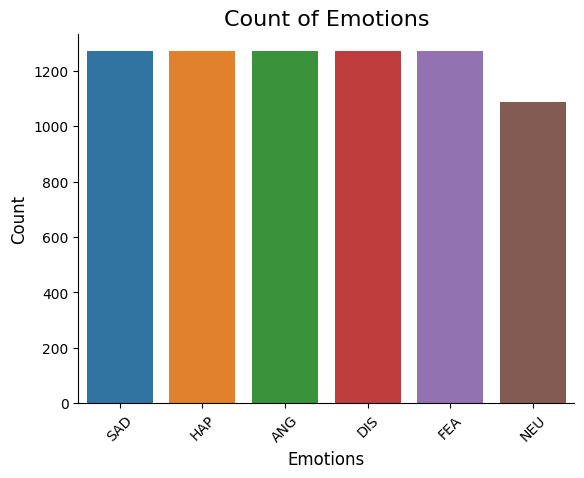

In [18]:
emotion_counts = Crema_df['Emotions'].value_counts()
plt.title('Count of Emotions', size=16)
sn.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sn.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

##Playing audio file and plotting it to look at the output with spectograms

In [19]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

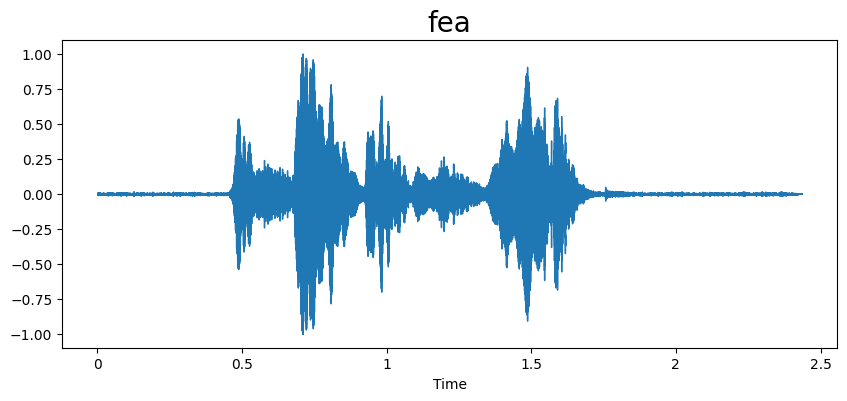

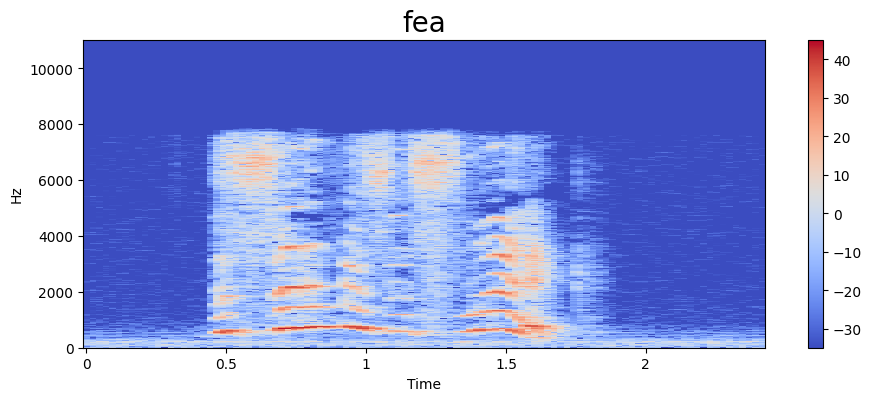

In [24]:
# Picking a fearful track
emotion = 'fea'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion.upper()])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

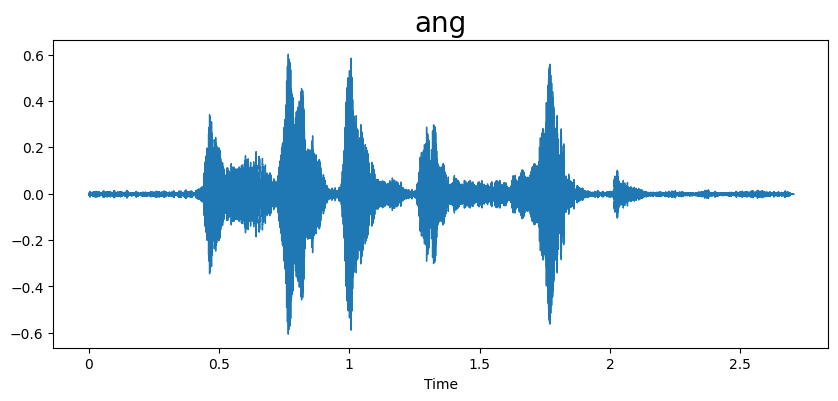

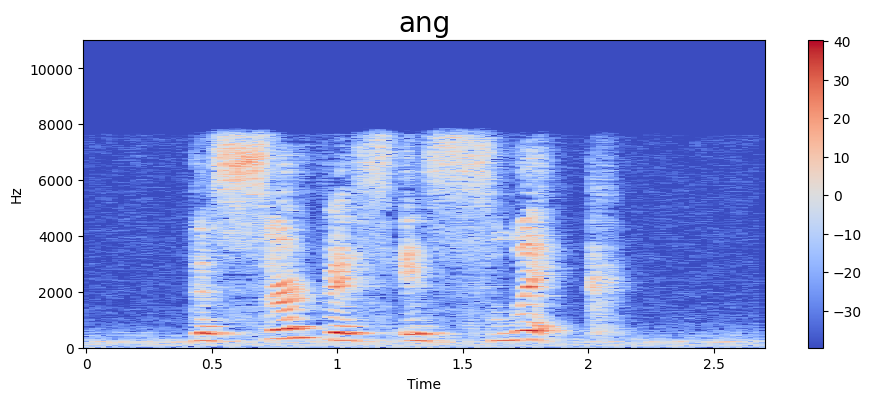

In [25]:
# Picking a angry track
emotion = 'ang'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion.upper()])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

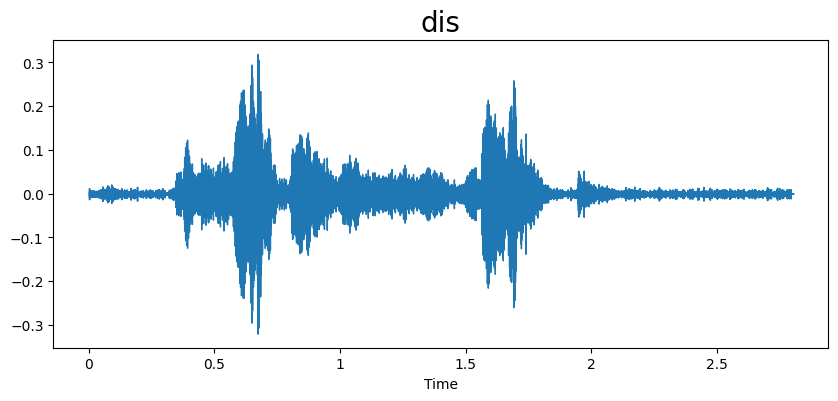

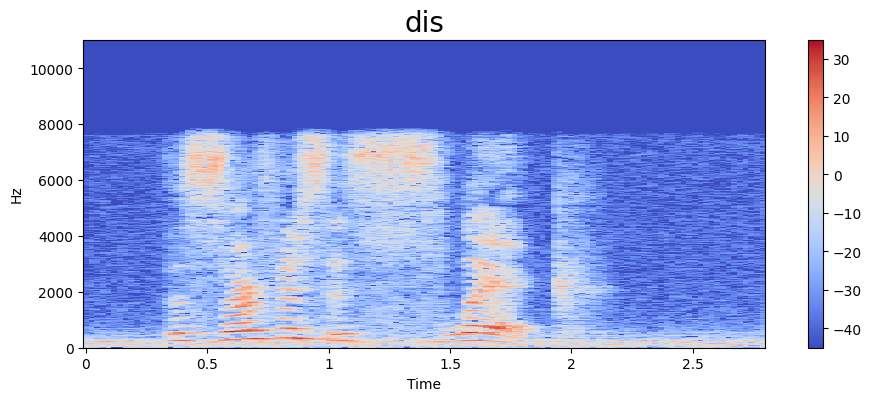

In [26]:
emotion = 'dis'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion.upper()])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

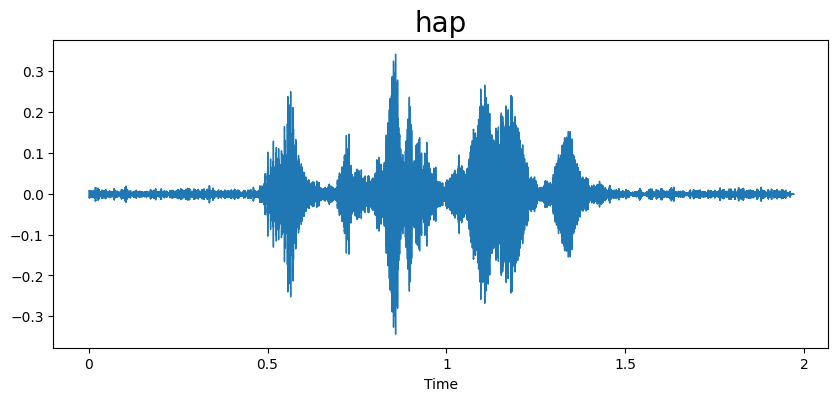

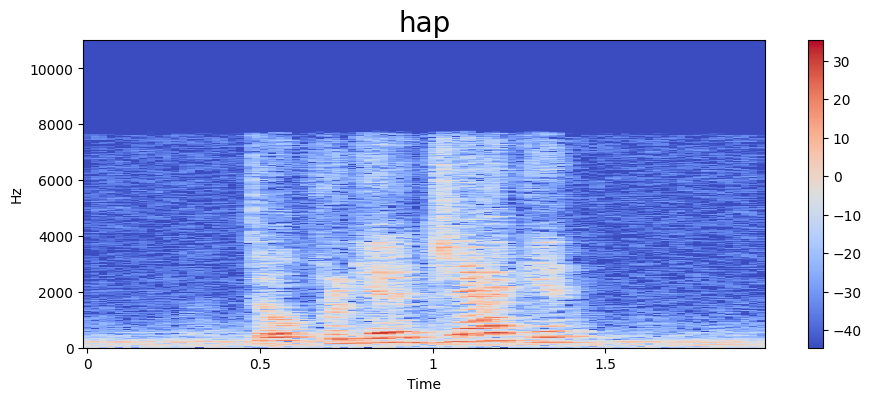

In [27]:
# Picking a happy track
emotion = 'hap'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion.upper()])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

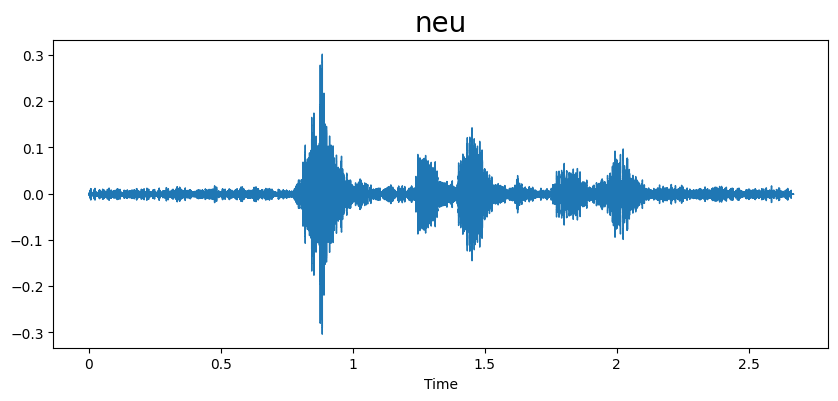

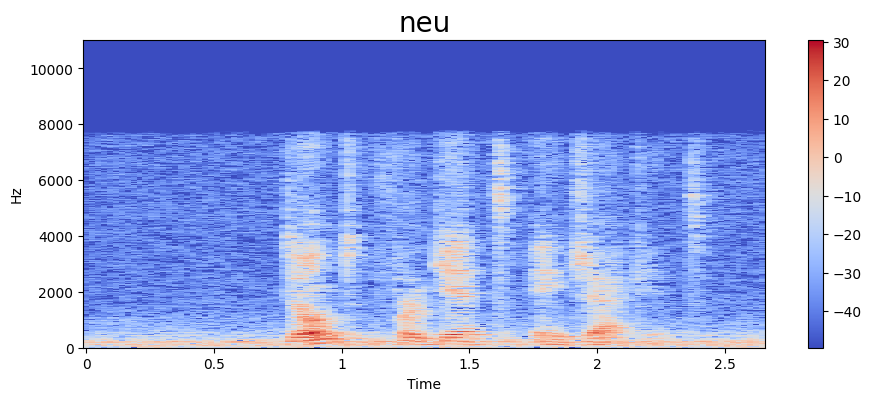

In [28]:
# Picking a neutral track
emotion='neu'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion.upper()])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

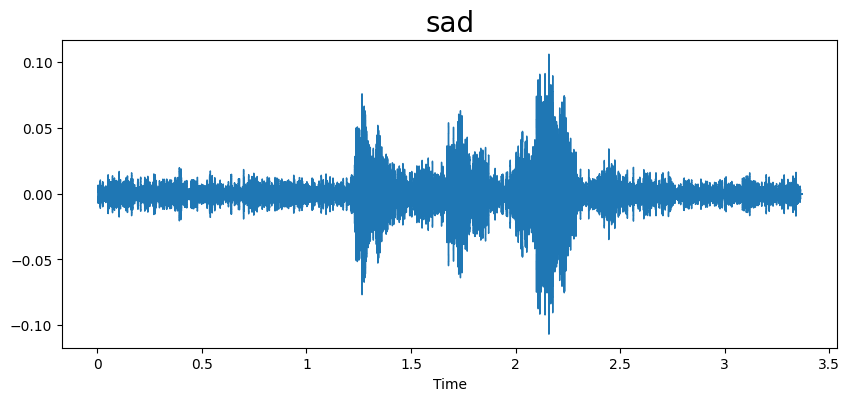

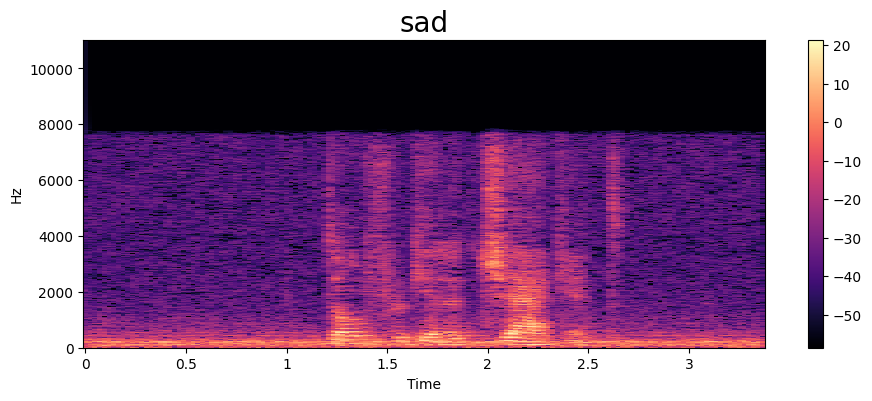

In [29]:
# Picking a sad track
emotion='sad'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion.upper()])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)